<a href="https://colab.research.google.com/github/AinsleyJacquemain/ASTRON-1221/blob/main/Dark_Matter_Project_Ainsley_Jacquemain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASTRO 1221-- Dark Matter Project

This code belongs to Ainsley Jacquemain and entails the orbital velocity calculations and the rotational curve generations of the Milky Way when the Bulge, Disk, and Halo components are added sequentially.

My partners are Maggie Ramsey and Lisa Chiang. ☺

In [ ]:
import astropy.units as u # import a Python package to call certain units.
import astropy.constants as const # import a Python package to call the value of certain constants.
import numpy as np  # import numpy package, which allows us to conduct mathematical operations for the defined quantities.

The calculations for the Bulge component start here.

In [ ]:
def CalculatingOrbitalVelocity(M, R): # M and R represent the input of the function.
    """
    This function calculates the orbital velocity of an object.
    Input:
    M, the mass.
    R, the radius.
    Output:
    orbitalVelocity, the orbital velocity.
    """
    orbitalVelocity = np.sqrt(const.G * M / R)
    return orbitalVelocity # This defines the output, or what value the definition will give.
    # Now we can use this same function, orbitalVelocity for multiple calculations.

In [ ]:
# Below is an array of arbitrary radii in kpc in our galaxy.
R_arr = (np.arange(1,35) * u.kpc)
print(R_arr.to(u.km))

[3.08567758e+16 6.17135516e+16 9.25703274e+16 1.23427103e+17
 1.54283879e+17 1.85140655e+17 2.15997431e+17 2.46854207e+17
 2.77710982e+17 3.08567758e+17 3.39424534e+17 3.70281310e+17
 4.01138086e+17 4.31994861e+17 4.62851637e+17 4.93708413e+17
 5.24565189e+17 5.55421965e+17 5.86278740e+17 6.17135516e+17
 6.47992292e+17 6.78849068e+17 7.09705844e+17 7.40562620e+17
 7.71419395e+17 8.02276171e+17 8.33132947e+17 8.63989723e+17
 8.94846499e+17 9.25703274e+17 9.56560050e+17 9.87416826e+17
 1.01827360e+18 1.04913038e+18] km


In [ ]:
M_bulge = (1e10 * u.solMass) # define M as a physical quantity with a value and a unit.
print(M_bulge.to(u.kg)) # print out M in the unit of kilograms.

1.988409870698051e+40 kg


In [ ]:
G = const.G # define G as the gravitational constant.
print(G.si) # print out G in the S.I. units.

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [ ]:
# Calculate the orbital velocities of the array.
v_bulge_arr = CalculatingOrbitalVelocity(M_bulge, R_arr) # use the pre-defined function.
print(v_bulge_arr.to(u.kpc/u.s)) # print the orbital velocity of the arbitary distances in kpc.

[6.72093970e-15 4.75242204e-15 3.88033635e-15 3.36046985e-15
 3.00569561e-15 2.74381214e-15 2.54027643e-15 2.37621102e-15
 2.24031323e-15 2.12534775e-15 2.02643957e-15 1.94016817e-15
 1.86405329e-15 1.79624669e-15 1.73533917e-15 1.68023493e-15
 1.63006731e-15 1.58414068e-15 1.54188931e-15 1.50284780e-15
 1.46662928e-15 1.43290916e-15 1.40141280e-15 1.37190607e-15
 1.34418794e-15 1.31808472e-15 1.29344545e-15 1.27013822e-15
 1.24804717e-15 1.22707009e-15 1.20711641e-15 1.18810551e-15
 1.16996543e-15 1.15263165e-15] kpc / s


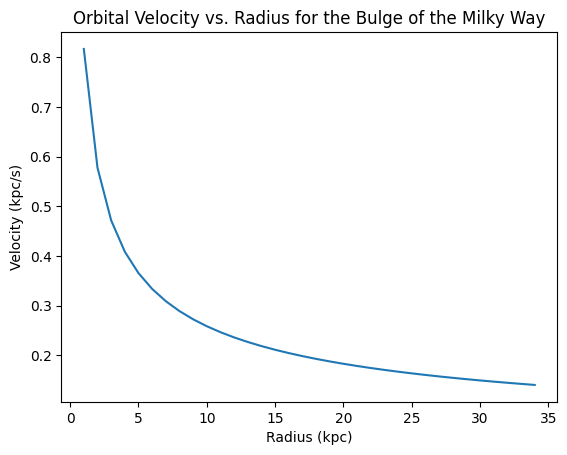

In [ ]:
# prompt: Can you help me with plotting v_bulge_arr and R_arr?

import matplotlib.pyplot as plt # import the plotting package.

plt.plot(R_arr, v_bulge_arr) # R-arr is the x-input, and v_bulge_arr is the y-input.
plt.xlabel('Radius (kpc)') # add a label + unit to the x-axis.
plt.ylabel('Velocity (kpc/s)') # add a label + unit to the y-axis.
plt.title('Orbital Velocity vs. Radius for the Bulge of the Milky Way') # add a title to the plot.
plt.show() # show the plot.

The calculations for the Disk component start here.

In [ ]:
M_disk = 1.25**2 * 1e11 * u.solMass # define disk total mass.
R_disk = 10 * u.kpc # define the outer edge of disk radius.
density_disk = M_disk / (np.pi * (R_disk**2)) # define the density in the unit of solar mass per square kpc.
print(density_disk.to(1e6 * u.solMass/u.kpc**2)) # check calculations by printing along the way.

497.3591971621729 1e+06 solMass / kpc2


In [ ]:
def calculatingEnclosedMassForDisk(R, density_disk=497.36 * 1e6 * u.solMass/u.kpc**2): # R and density_disk are the inputs of the function.
    """
    Input:
    R, the radius.
    Density_disk, the density of the disk used on each component of the array.
    Output:
    M, the enclosed mass.
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density_disk
    else:
        R = 10 * u.kpc
        M = np.pi * (R**2) * density_disk
    """
    The 'if statement' accounts for the radii components of the array that lie outside of the disk.
    If R < 10 * u.kpc, we calculate the enclosed mass as expected.
    If anything else, then R = 10 * u.kpc (R is truncated at 10 kpc).
    """
    return(M)

In [ ]:
print(calculatingEnclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # convert to 1e6 solar masses to increase readability.
print(calculatingEnclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")
print(calculatingEnclosedMassForDisk(10 * u.kpc).to(1e6 * u.solMass), "at 10 kpc")
print(calculatingEnclosedMassForDisk(10 * u.kpc).to(1e6 * u.solMass), "at 40 kpc")
# Check that different radii result in different enclosed masses.
# Notice how the last two values are the same. This shows that the radius has been truncated correctly at 10 kpc.


1562.5025221894198 1e+06 solMass at 1 kpc
39062.563054735496 1e+06 solMass at 5 kpc
156250.25221894198 1e+06 solMass at 10 kpc
156250.25221894198 1e+06 solMass at 40 kpc


In [ ]:
def calculatingEnclosedMassForMilkyWay(R, density_disk = 497.36 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass): # R, density_disk, and M_bulge are the inputs of the function.
    """
    Input:
    R, the radius.
    Density_disk, the density of the disk used on each component of the array.
    M_bulge, the mass of the bulge.
    M_disk, the mass of the disk (which is not given as a value in the line above, because it must be calculated for radii each component of the array).
    Output:
    M, the total enclosed mass for the Milky Way up to this point.

    When finding orbital velocity, sum the masses, then calculate velocity.
    """
    M_disk = calculatingEnclosedMassForDisk(R, density_disk=density_disk)
    M_total = M_disk + M_bulge
    return(M_total)
calculatingEnclosedMassForMilkyWay(R_disk) # continue to check along the way.


<Quantity 1.66250252e+11 solMass>

In [ ]:
# Define the arrays to be calculated.
M_disk = np.zeros(len(R_arr)) * u.solMass # specify unit.
M_total = np.zeros(len(R_arr)) * u.solMass # specify unit.
"""
This specification helps the code pass an array through calculatingEnclosedMassForDisk, possibly preventing bugs.
np.zeros is meant to be a placeholder. It will generate an array of zeros. See printed arrays below.
len(R_arr) says that the array of zeros will have the same number of values as R_arr, which is why we see 30 zeros below.
"""
M_disk = np.zeros(len(R_arr)) * u.solMass # specify unit.
print(M_disk)
print(M_total)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] solMass
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] solMass


In [ ]:
# Calculate the enclosed masses for the disk radial components and the total radial components.
for i in np.arange(len(R_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])
    print(R_arr[i], M_disk[i])
"""
'for i in:' is a control flow statement called a 'for loop'.
i goes through each array value and is calculatingEnclosedMassforDisk, making an array for M_disk, and an array for M_total.
"""
# Calculate the resulting orbital velocity due to each component.
v_disk_arr = CalculatingOrbitalVelocity(M_disk, R_arr)
v_bulge_disk_arr = CalculatingOrbitalVelocity(M_total, R_arr)

1.0 kpc 1562502522.1894195 solMass
2.0 kpc 6250010088.757678 solMass
3.0 kpc 14062522699.704775 solMass
4.0 kpc 25000040355.030712 solMass
5.0 kpc 39062563054.73549 solMass
6.0 kpc 56250090798.8191 solMass
7.0 kpc 76562623587.28156 solMass
8.0 kpc 100000161420.12285 solMass
9.0 kpc 126562704297.34297 solMass
10.0 kpc 156250252218.94196 solMass
11.0 kpc 156250252218.94196 solMass
12.0 kpc 156250252218.94196 solMass
13.0 kpc 156250252218.94196 solMass
14.0 kpc 156250252218.94196 solMass
15.0 kpc 156250252218.94196 solMass
16.0 kpc 156250252218.94196 solMass
17.0 kpc 156250252218.94196 solMass
18.0 kpc 156250252218.94196 solMass
19.0 kpc 156250252218.94196 solMass
20.0 kpc 156250252218.94196 solMass
21.0 kpc 156250252218.94196 solMass
22.0 kpc 156250252218.94196 solMass
23.0 kpc 156250252218.94196 solMass
24.0 kpc 156250252218.94196 solMass
25.0 kpc 156250252218.94196 solMass
26.0 kpc 156250252218.94196 solMass
27.0 kpc 156250252218.94196 solMass
28.0 kpc 156250252218.94196 solMass
29.0 k

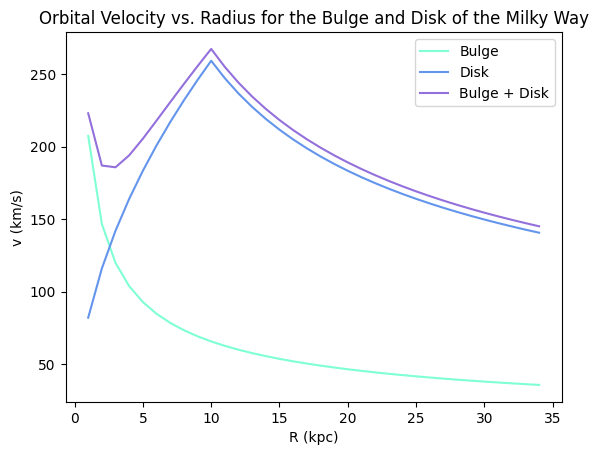

In [ ]:
# Plot the data below with radius (r) as a common x-input and velocity (v) as a common y-input.
plt.plot(R_arr.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="aquamarine", label="Bulge") # add a label to the rotation curve for the 'bulge'.
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="cornflowerblue", label="Disk") # add a label to the rotation curve for the 'disk'.
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="mediumpurple", label="Bulge + Disk") # add a label to the rotation curve for the 'bulge + disk'.
plt.xlabel('R (kpc)') # add a label + unit to the x-axis.
plt.ylabel('v (km/s)') # add a label + unit to the y-axis.
plt.legend() # add a legend to differentiate between each datum.
plt.title('Orbital Velocity vs. Radius for the Bulge and Disk of the Milky Way') # add a title to the plot.
plt.show() # show the plot.

The calculations for the Halo component start here.

In [ ]:
M_halo = 1e12 * u.solMass # define halo total mass.
R_halo = 50 * u.kpc # define the outer edge of halo radius.
density_halo = M_halo / (np.pi * (4 / 3) * (R_halo**3)) # define the density is in the unit of solar mass per square kpc.
print(density_halo.to(1e6 * u.solMass/u.kpc**3)) # check calculations by printing along the way.

1.9098593171027443 1e+06 solMass / kpc3


In [ ]:
def calculatingEnclosedMassForHalo (R, density_halo = 1.91 * 1e6 * u.solMass/u.kpc**3): # R and density_halo are the inputs of the function.
    """
    Input:
    R, the radius.
    Density_halo, the density of the halo used on each component of the array.
    Output:
    M, the enclosed mass.
    """
    M = np.pi * (4 / 3) * (R**3) * density_halo
    return(M)

In [ ]:
print(calculatingEnclosedMassForHalo(1 * u.kpc, density_halo).to(1e6 * u.solMass), "at 1 kpc") # convert to 1e6 solar masses to increase readability.
print(calculatingEnclosedMassForHalo(5 * u.kpc, density_halo).to(1e6 * u.solMass), "at 5 kpc")

8.000000000000002 1e+06 solMass at 1 kpc
1000.0000000000003 1e+06 solMass at 5 kpc


In [ ]:
def calculatingNewEnclosedMassForMilkyWay(R, density_disk = 497.36 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass): # R, density_disk, and M_bulge are the inputs of the function.
# While odd, density_halo is not in the above values because the differences in units between density_disk and density_halo cause issues in the code.
    """
    Input:
    R, the radius.
    Density_disk, the density of the disk used on each component of the array.
    Density_halo, the density of the halo used on each component of the array.
    M_bulge, the mass of the bulge.
    M_disk, the mass of the disk (which is not given as a value in the line above, because it must be calculated for radii each component of the array).
    M_halo, the mass of the halo (which is not given as a value in the line above, because it must be calculated for radii each component of the array).
    Output:
    M, the total enclosed mass for the Milky Way up to this point.

    When finding orbital velocity, sum the masses, then calculate velocity.
    """
    M_disk = calculatingEnclosedMassForDisk(R, density_disk)
    M_halo = calculatingEnclosedMassForHalo(R, density_halo)
    M_total = M_disk + M_bulge + M_halo # M_total is a global variable, not a local variable, so we can reuse it. Yay!
    return(M_total)
calculatingNewEnclosedMassForMilkyWay(R_halo) # continue to check along the way.

<Quantity 1.16625025e+12 solMass>

In [ ]:
# Define the arrays to be calculated.
M_halo = np.zeros(len(R_arr)) * u.solMass # specify unit.
M_total2 = np.zeros(len(R_arr)) * u.solMass # specify unit.
"""
This specification helps the code pass an array through calculatingEnclosedMassForDisk, possibly preventing bugs.
np.zeros is meant to be a placeholder. It will generate an array of zeros. See printed arrays below.
len(R_arr) says that the array of zeros will have the same number of values as R_arr, which is why we see 30 zeros below.
"""
M_halo = np.zeros(len(R_arr)) * u.solMass # specify unit.
print(M_halo)
print(M_total2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] solMass
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] solMass


In [ ]:
# Calculate the enclosed masses for the disk radial components and the total radial components.
for i in np.arange(len(R_arr)):
    M_halo[i] = calculatingEnclosedMassForHalo(R_arr[i], density_halo)
    M_total2[i] = calculatingNewEnclosedMassForMilkyWay(R_arr[i])
    print(R_arr[i], M_halo[i])
"""
'for i in:' is a control flow statement called a 'for loop'.
i goes through each array value and is calculatingEnclosedMassforHalo, making an array for M_disk, and an array for M_total2.
"""
# Calculate the resulting orbital velocity due to each component.
v_halo_arr = CalculatingOrbitalVelocity(M_halo, R_arr)
v_bulge_disk_halo_arr = CalculatingOrbitalVelocity(M_total2, R_arr)

1.0 kpc 8000000.0 solMass
2.0 kpc 64000000.0 solMass
3.0 kpc 216000000.0 solMass
4.0 kpc 512000000.0 solMass
5.0 kpc 1000000000.0000001 solMass
6.0 kpc 1728000000.0 solMass
7.0 kpc 2744000000.0 solMass
8.0 kpc 4096000000.0 solMass
9.0 kpc 5832000000.0 solMass
10.0 kpc 8000000000.000001 solMass
11.0 kpc 10648000000.0 solMass
12.0 kpc 13824000000.0 solMass
13.0 kpc 17576000000.0 solMass
14.0 kpc 21952000000.0 solMass
15.0 kpc 27000000000.0 solMass
16.0 kpc 32768000000.0 solMass
17.0 kpc 39304000000.0 solMass
18.0 kpc 46656000000.0 solMass
19.0 kpc 54872000000.0 solMass
20.0 kpc 64000000000.00001 solMass
21.0 kpc 74088000000.0 solMass
22.0 kpc 85184000000.0 solMass
23.0 kpc 97336000000.0 solMass
24.0 kpc 110592000000.0 solMass
25.0 kpc 125000000000.0 solMass
26.0 kpc 140608000000.0 solMass
27.0 kpc 157464000000.0 solMass
28.0 kpc 175616000000.0 solMass
29.0 kpc 195112000000.0 solMass
30.0 kpc 216000000000.0 solMass
31.0 kpc 238328000000.0 solMass
32.0 kpc 262144000000.0 solMass
33.0 kpc 2

In [ ]:
from google.colab import files
uploaded = files.upload()
# Use this to upload a file into the code. In our case, the data provided in the file makes an overplot for the plot below.

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [ ]:
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")
# In this sequence, a package reads the provided data in the file and saves it under 'tab', thus making it available for use in the plot below.

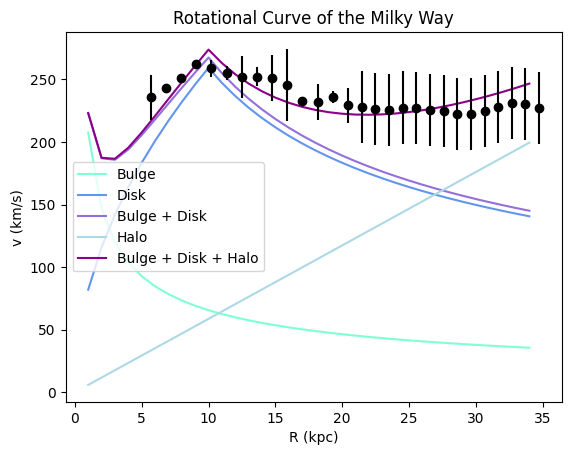

In [ ]:
# Plot the data below with radius (r) as a common x-input and velocity (v) as a common y-input.
plt.plot(R_arr.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="aquamarine", label="Bulge") # add a label to the rotation curve for the 'bulge'.
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="cornflowerblue", label="Disk") # add a label to the rotation curve for the 'disk'.
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="mediumpurple", label="Bulge + Disk") # add a label to the rotation curve for the 'bulge + disk'.
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="lightblue", label="Halo",) # add a label to the rotation curve for the 'halo'.
plt.plot(R_arr.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="darkmagenta", label="Bulge + Disk + Halo") # add a label to the rotation curve for the 'bulge + disk + halo'.
plt.xlabel('R (kpc)') # add a label + unit to the x-axis.
plt.ylabel('v (km/s)') # add a label + unit to the y-axis.
plt.legend() # add a legend to differentiate between each datum.
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")
plt.title('Rotational Curve of the Milky Way') # add a title to the plot.
plt.show() # show the plot.